In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.max_columns',None)


In [3]:
data = pd.read_csv('cleaned_data')
data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
def analysis(df,target):
    instance = df.shape[0]
    types=df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques=df.T.apply(pd.Series.unique,1)
    nulls= df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(pd.Series.nunique)
    null_perc = (df.isnull().sum()/instance)*100
    skewness = df.skew()
    kurtosis = df.kurt()
    
    corr = df.corr()[target]
    str = pd.concat([types, counts,uniques, nulls,distincts, null_perc, skewness, kurtosis, corr], axis = 1, sort=False)
    corr_col = 'corr '  + target
    cols = ['types', 'counts','uniques', 'nulls','distincts', 'missing_ratio', 'skewness', 'kurtosis', corr_col ]
    str.columns = cols
    return str

In [5]:
details= analysis(data,'cardio')
details

,types,counts,uniques,nulls,distincts,missing_ratio,skewness,kurtosis,corr cardio
age,int64,64996,"[61.0, 40.0, 60.0, 39.0, 64.0, 57.0, 49.0, 58....",0,28,0.000,-0.321,-0.797,0.230
gender,int64,64996,"[1.0, 2.0]",0,2,0.000,0.612,-1.625,0.000
height,int64,64996,"[155.0, 163.0, 165.0, 164.0, 162.0, 161.0, 157...",0,103,0.000,-0.590,7.437,-0.020
weight,float64,64996,"[69.0, 71.0, 70.0, 85.0, 62.0, 61.0, 72.0, 93....",0,272,0.000,1.018,2.523,0.169
ap_hi,int64,64996,"[130.0, 110.0, 120.0, 100.0, 140.0, 160.0, 170...",0,101,0.000,1.158,1.965,0.422
ap_lo,int64,64996,"[80.0, 70.0, 90.0, 100.0, 79.0, 78.0, 110.0, 8...",0,64,0.000,0.821,1.491,0.339
cholesterol,int64,64996,"[2.0, 1.0, 3.0]",0,3,0.000,1.574,0.940,0.219
gluc,int64,64996,"[2.0, 1.0, 3.0]",0,3,0.000,2.383,4.212,0.087
smoke,int64,64996,"[0.0, 1.0]",0,2,0.000,2.903,6.427,-0.016
alco,int64,64996,"[0.0, 1.0]",0,2,0.000,3.951,13.607,-0.008


In [30]:
X= data.iloc[:,:-1] 
y= data.iloc[:,-1]

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

In [8]:
def poly_scaled(X,degree,**kwargs):
        # Creates polynomial features,scales the data and returns final train and test sets.
        poly = PolynomialFeatures(degree)
        X_poly=poly.fit_transform(X)
        scaler = MinMaxScaler()
        X_poly_scaled = pd.DataFrame(scaler.fit_transform(X_poly)) 
        print(X_poly_scaled.shape)
        
        return X_poly_scaled

In [18]:

X=poly_scaled(X,3)

(64996, 364)


In [10]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363
0,0.000,0.914,0.000,0.513,0.307,0.252,0.257,0.500,0.500,0.000,0.000,1.000,0.885,0.323,0.576,0.359,0.408,0.447,0.571,0.571,0.000,0.000,0.953,0.000,0.279,0.127,0.096,0.095,0.200,0.200,0.000,0.000,0.500,0.353,0.257,0.380,0.401,0.367,0.473,0.000,0.000,0.620,0.116,0.236,0.238,0.236,0.236,0.000,0.000,0.345,0.169,0.182,0.292,0.295,0.000,0.000,0.542,0.185,0.288,0.288,0.000,0.000,0.593,0.375,0.375,0.000,0.000,0.667,0.375,0.000,0.000,0.667,0.000,0.000,0.000,0.000,0.000,1.000,0.852,0.392,0.642,0.343,0.480,0.500,0.577,0.577,0.000,0.000,0.908,0.141,0.300,0.149,0.182,0.191,0.262,0.262,0.000,0.000,0.477,0.376,0.305,0.419,0.438,0.399,0.501,0.000,0.000,0.652,0.149,0.241,0.269,0.254,0.254,0.000,0.000,0.404,0.215,0.241,0.346,0.352,0.000,0.000,0.542,0.260,0.366,0.366,0.000,0.000,0.587,0.393,0.393,0.000,0.000,0.635,0.393,0.000,0.000,0.635,0.000,0.000,0.000,0.000,0.000,0.953,0.000,0.129,0.062,0.043,0.041,0.091,0.091,0.000,0.000,0.250,0.254,0.106,0.174,0.192,0.227,0.225,0.000,0.000,0.374,0.057,0.112,0.103,0.108,0.109,0.000,0.000,0.173,0.077,0.089,0.135,0.136,0.000,0.000,0.271,0.089,0.138,0.138,0.000,0.000,0.308,0.176,0.176,0.000,0.000,0.333,0.176,0.000,0.000,0.333,0.000,0.000,0.000,0.000,0.000,0.500,0.230,0.217,0.327,0.281,0.244,0.393,0.000,0.000,0.384,0.100,0.209,0.212,0.187,0.201,0.000,0.000,0.297,0.201,0.240,0.293,0.293,0.000,0.000,0.477,0.256,0.293,0.307,0.000,0.000,0.496,0.257,0.332,0.000,0.000,0.413,0.327,0.000,0.000,0.522,0.000,0.000,0.000,0.000,0.000,0.620,0.041,0.101,0.103,0.094,0.094,0.000,0.000,0.119,0.137,0.152,0.167,0.206,0.000,0.000,0.298,0.144,0.187,0.194,0.000,0.000,0.275,0.162,0.162,0.000,0.000,0.251,0.162,0.000,0.000,0.251,0.000,0.000,0.000,0.000,0.000,0.345,0.107,0.117,0.182,0.184,0.000,0.000,0.293,0.128,0.184,0.188,0.000,0.000,0.333,0.225,0.225,0.000,0.000,0.394,0.226,0.000,0.000,0.394,0.000,0.000,0.000,0.000,0.000,0.542,0.128,0.178,0.178,0.000,0.000,0.351,0.224,0.224,0.000,0.000,0.395,0.224,0.000,0.000,0.395,0.000,0.000,0.000,0.000,0.000,0.593,0.269,0.269,0.000,0.000,0.444,0.269,0.000,0.000,0.444,0.000,0.000,0.000,0.000,0.000,0.667,0.269,0.000,0.000,0.444,0.000,0.000,0.000,0.000,0.000,0.667,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
1,0.000,0.314,0.000,0.554,0.317,0.116,0.122,0.000,0.000,0.000,0.000,1.000,0.233,0.111,0.329,0.221,0.097,0.113,0.067,0.067,0.000,0.000,0.625,0.000,0.301,0.132,0.044,0.045,0.000,0.000,0.000,0.000,0.500,0.396,0.282,0.318,0.354,0.155,0.200,0.000,0.000,0.652,0.123,0.199,0.209,0.112,0.112,0.000,0.000,0.355,0.070,0.076,0.027,0.030,0.000,0.000,0.458,0.081,0.026,0.026,0.000,0.000,0.519,0.000,0.000,0.000,0.000,0.333,0.000,0.000,0.000,0.333,0.000,0.000,0.000,0.000,0.000,1.0

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [113]:
imp_features = SelectKBest(score_func= chi2, k=20)

In [114]:
fit = imp_features.fit(X,y)
fit

SelectKBest(k=20, score_func=<function chi2 at 0x000001C3A0B0DEA0>)

In [115]:
df_scores = pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

In [116]:
featurescores = pd.concat([df_scores,df_columns],axis=1)
featurescores.columns = ['scores','features']
featurescores=featurescores.sort_values(by='scores',ascending=False)
featurescores=featurescores.reset_index(drop=True)

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns


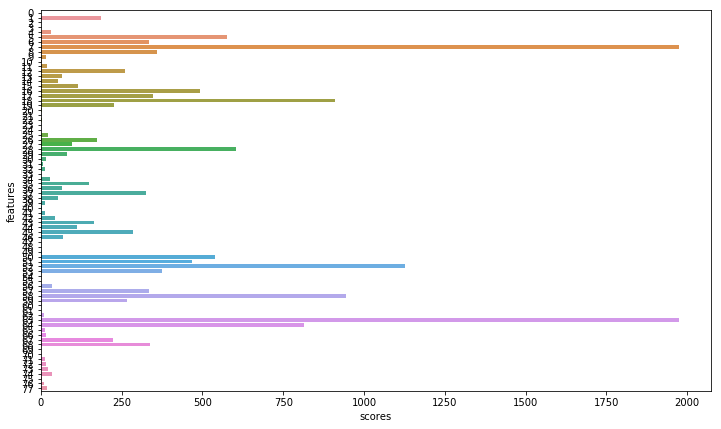

In [89]:
plt.figure(figsize=(12,7))
sns.barplot(y=featurescores['features'],x=featurescores['scores'],orient='h')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [ ]:
'''def poly_scaled(X_train,X_test,degree,**kwargs):
        # Creates polynomial features,scales the data and returns final train and test sets.
        poly = PolynomialFeatures(degree)
        train_poly=poly.fit_transform(X_train)
        test_poly=poly.fit_transform(X_test)
        scaler = StandardScaler()
        train_poly_scaled = pd.DataFrame(scaler.fit_transform(train_poly),) 
        test_poly_scaled = pd.DataFrame(scaler.fit_transform(test_poly))
        print(train_poly_scaled.shape, test_poly_scaled.shape)
        
        return train_poly_scaled,test_poly_scale
        '''

In [90]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77
0,0.000,0.914,0.000,0.513,0.307,0.252,0.257,0.500,0.500,0.000,0.000,1.000,0.885,0.323,0.576,0.359,0.408,0.447,0.571,0.571,0.000,0.000,0.953,0.000,0.279,0.127,0.096,0.095,0.200,0.200,0.000,0.000,0.500,0.353,0.257,0.380,0.401,0.367,0.473,0.000,0.000,0.620,0.116,0.236,0.238,0.236,0.236,0.000,0.000,0.345,0.169,0.182,0.292,0.295,0.000,0.000,0.542,0.185,0.288,0.288,0.000,0.000,0.593,0.375,0.375,0.000,0.000,0.667,0.375,0.000,0.000,0.667,0.000,0.000,0.000,0.000,0.000,1.000
1,0.000,0.314,0.000,0.554,0.317,0.116,0.122,0.000,0.000,0.000,0.000,1.000,0.233,0.111,0.329,0.221,0.097,0.113,0.067,0.067,0.000,0.000,0.625,0.000,0.301,0.132,0.044,0.045,0.000,0.000,0.000,0.000,0.500,0.396,0.282,0.318,0.354,0.155,0.200,0.000,0.000,0.652,0.123,0.199,0.209,0.112,0.112,0.000,0.000,0.355,0.070,0.076,0.027,0.030,0.000,0.000,0.458,0.081,0.026,0.026,0.000,0.000,0.519,0.000,0.000,0.000,0.000,0.333,0.000,0.000,0.000,0.333,0.000,0.000,0.000,0.000,0.000,1.000
2,0.000,0.886,0.000,0.564,0.312,0.184,0.257,0.000,0.000,0.000,0.000,1.000,0.848,0.313,0.613,0.358,0.344,0.434,0.190,0.190,0.000,0.000,0.938,0.000,0.306,0.129,0.070,0.095,0.000,0.000,0.000,0.000,0.500,0.407,0.282,0.370,0.439,0.158,0.204,0.000,0.000,0.660,0.120,0.218,0.242,0.110,0.110,0.000,0.000,0.350,0.117,0.151,0.044,0.048,0.000,0.000,0.500,0.185,0.055,0.055,0.000,0.000,0.593,0.000,0.000,0.000,0.000,0.333,0.000,0.000,0.000,0.333,0.000,0.000,0.000,0.000,0.000,1.000
3,0.000,0.286,1.000,0.564,0.392,0.184,0.257,0.000,0.000,1.000,1.000,1.000,0.209,0.495,0.322,0.269,0.122,0.164,0.061,0.061,0.609,0.609,0.609,1.000,0.766,0.393,0.380,0.497,0.200,0.200,1.000,1.000,1.000,0.407,0.354,0.370,0.439,0.158,0.204,0.833,0.797,0.660,0.178,0.274,0.305,0.138,0.138,0.478,0.464,0.425,0.117,0.151,0.044,0.048,0.500,0.500,0.500,0.185,0.055,0.055,0.593,0.593,0.593,0.000,0.000,0.333,0.333,0.333,0.000,0.333,0.333,0.333,1.000,1.000,1.000,1.000,1.000,1.000
4,0.000,1.000,0.000,0.513,0.270,0.184,0.257,0.000,0.000,0.000,0.000,1.000,1.000,0.354,0.615,0.335,0.386,0.486,0.215,0.215,0.000,0.000,1.000,0.000,0.279,0.108,0.070,0.095,0.000,0.000,0.000,0.000,0.500,0.353,0.225,0.337,0.401,0.144,0.186,0.000,0.000,0.620,0.093,0.188,0.208,0.095,0.095,0.000,0.000,0.310,0.117,0.151,0.044,0.048,0.000,0.000,0.500,0.185,0.055,0.055,0.000,0.000,0.593,0.000,0.000,0.000,0.000,0.333,0.000,0.000,0.000,0.333,0.000,0.000,0.000,0.000,0.000,1.000


In [20]:
X = pd.DataFrame(SelectKBest(score_func= chi2, k=45).fit_transform(X,y))

In [21]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,0.252,0.500,0.408,0.571,0.200,0.169,0.182,0.292,0.288,0.375,0.375,0.480,0.577,0.262,0.399,0.254,0.215,0.241,0.346,0.260,0.366,0.393,0.393,0.135,0.138,0.176,0.176,0.293,0.293,0.257,0.162,0.107,0.117,0.182,0.128,0.184,0.225,0.225,0.178,0.224,0.224,0.269,0.269,0.444,0.269
1,0.116,0.000,0.097,0.067,0.000,0.070,0.076,0.027,0.026,0.000,0.000,0.096,0.066,0.031,0.096,0.071,0.042,0.046,0.030,0.052,0.033,0.020,0.020,0.012,0.013,0.000,0.000,0.099,0.105,0.049,0.037,0.040,0.045,0.023,0.049,0.019,0.008,0.008,0.023,0.008,0.008,0.000,0.000,0.111,0.000
2,0.184,0.000,0.344,0.190,0.000,0.117,0.151,0.044,0.055,0.000,0.000,0.415,0.241,0.087,0.178,0.116,0.162,0.206,0.107,0.254,0.129,0.057,0.057,0.020,0.026,0.000,0.000,0.115,0.130,0.050,0.036,0.071,0.089,0.039,0.111,0.043,0.013,0.013,0.053,0.016,0.016,0.000,0.000,0.111,0.000
3,0.184,0.000,0.122,0.061,0.200,0.117,0.151,0.044,0.055,0.000,0.000,0.104,0.059,0.138,0.093,0.087,0.066,0.086,0.038,0.110,0.049,0.018,0.018,0.118,0.138,0.059,0.059,0.115,0.130,0.050,0.045,0.071,0.089,0.039,0.111,0.043,0.013,0.013,0.053,0.016,0.016,0.000,0.000,0.111,0.000
4,0.184,0.000,0.386,0.215,0.000,0.117,0.151,0.044,0.055,0.000,0.000,0.489,0.284,0.099,0.179,0.108,0.180,0.229,0.121,0.281,0.144,0.064,0.064,0.020,0.026,0.000,0.000,0.104,0.119,0.046,0.031,0.071,0.089,0.039,0.111,0.043,0.013,0.013,0.053,0.016,0.016,0.000,0.000,0.111,0.000


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [32]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(max_depth=3)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

C:\Users\Neeraj Bhadani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7052741707181981

In [33]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=25)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7104437196135147

In [36]:
from sklearn.linear_model import LogisticRegression as LR
clf = LR(C=10)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

C:\Users\Neeraj Bhadani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7205981906578867

In [1]:
from catboost import CatBoostClassifier


ModuleNotFoundError: No module named 'CatBoost'